First imported pacakge we might need to data analysis.

In [1]:
import pandas as pd #<-- For shapping tables
import numpy as np #for math stuff if needed
import matplotlib #<-- for Visualisation
import matplotlib.pyplot as plt#<-- for Visualisation
import seaborn as sns # 
import geopandas as gpd 
from shapely.geometry import Point
from geopandas import GeoDataFrame

Nowe We can import the needed data. We have sewershade data, Community gardens data and 

In [2]:
Sshade = pd.read_csv("SewershedData.txt")
CoGardens = pd.read_csv("NYC_Greenthumb_Community_Gardens.csv")
#Food deserts?
#floodings?

In [3]:
Sshade.shape#find number of culums and rows for sewershades data

(1140, 8)

In [4]:
CoGardens.shape#find number of culums and rows for Co_Gardens data

(536, 17)

In [5]:
CoGardens.head()

,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...


In [6]:
#Create a culum that will show us coordinates in the "graph" using x and y axis
CoGardens = gpd.GeoDataFrame(
    CoGardens, geometry=gpd.points_from_xy(CoGardens.Longitude, CoGardens.Latitude))

In [7]:
CoGardens.head(10)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...,POINT (-73.979 40.727)
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...,POINT (-73.948 40.796)
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...,POINT (-73.940 40.799)
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...,POINT (-73.983 40.729)
5,NaN,X,X12,15.0,211th Street Block Association.,Carlisle Place,0.182,NYRP,NaN,At E. 211th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
6,NaN,X,X06,15.0,2120 Mapes Avenue HDFC,2124 Mapes Avenue,0.151,TPL,NaN,At E. 181st Street,40.847216,-73.885018,10460,36501.0,2000000,2031110007,East Tremont ...,POINT (-73.885 40.847)
7,B535,B,B05,42.0,400 Montauk Avenue Block Association. (Ismael ...,New Lots Avenue,0.091,DPR,East New York,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
8,M313A,M,M03,1.0,5th Street Slope Garden Club,626-27 East 5th Street,0.031,DPR,East Village,Active,40.723433,-73.980995,10009,2601.0,1075625,1003870020,Lower East Side ...,POINT (-73.981 40.723)
9,NaN,B,B07,38.0,6/15 Green,274 15th Street,0.287,TPL,Park Slope,corner of 6th Avenue & 15th Street,40.664706,-73.987554,11215,141.0,3000000,3010480034,Park Slope-Gowanus ...,POINT (-73.988 40.665)


The Geometry culum is now availible to give us our coordinates to use with Geo-pandas

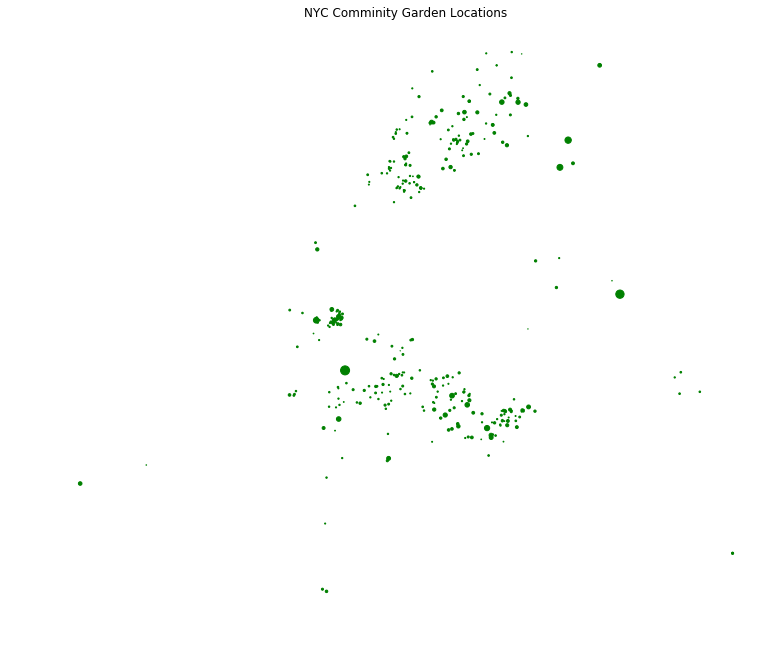

In [8]:
#Plot the gardens and show the relative sizes
#The size of the dots represent the size of the 
CoGardens.plot( color='green',legend=True,figsize=(13, 13),markersize=CoGardens.Size * 30)
plt.axis('off')
plt.title('NYC Comminity Garden Locations')
plt.show()

In [9]:
Sshade.head() #check out the data for sewerhsade

,OBJECTID,COMB_OR_SE,NewWatrshd,Outfall,Shape__Area,Shape__Length,Shape_Length,Shape_Area
0,1,COMBINED,Alley Creek,TI-008,5.559777e+06,14513.588497,14513.588497,5.559777e+06
1,2,COMBINED,Bronx River,HP-004,3.572993e+06,10927.988770,10927.988770,3.572993e+06
2,3,COMBINED,Bronx River,HP-007,1.008950e+07,40860.702110,40860.702110,1.008950e+07
3,4,COMBINED,Bronx River,HP-008,2.163705e+06,8622.559014,8622.559014,2.163705e+06
4,5,COMBINED,Bronx River,HP-009,2.805350e+06,9179.555815,9179.555815,2.805350e+06


What the culums mean:
OBJECTID - ID
COMB_OR_SE - combined or separatdd
NewWatrshd -  location of watershade
Outfall - the place where a river, drain, or sewer empties into the sea, a river, or a lake.
Shape__Length - length
Shape_Area - area


In [10]:
#drop the duplicate for area and length
Sshade = Sshade.drop("Shape__Area", axis = 1)
Sshade = Sshade.drop("Shape__Length", axis = 1)

In [11]:
#are the outfalls all unique?
#Sshade.Outfall.unique() not useful

In [12]:
#Water Shades are not unique
len(Sshade.Outfall.unique())

1071

In [13]:
Sshade.NewWatrshd.unique()

array(['Alley Creek', 'Bronx River', 'Coney Island Creek',
       'East River / Open Waters', 'Flushing Bay', 'Flushing Creek',
       'Gowanus Canal', 'Hutchinson River', 'Jamaica Bay and Tributaries',
       'Newtown Creek', 'Westchester Creek'], dtype=object)

In [14]:
#Add the area for each NewWatershad
Sshade_sum_type = Sshade.groupby(['NewWatrshd']).sum()

In [15]:
Sshade_sum_type.head(11)

,OBJECTID,Shape_Length,Shape_Area
NewWatrshd,,,
Alley Creek,16162,1.686692e+05,3.459238e+07
Bronx River,8123,1.432831e+05,2.884302e+07
Coney Island Creek,19117,1.101599e+05,2.312212e+07
East River / Open Waters,233416,2.768685e+06,6.669561e+08
Flushing Bay,30064,1.956417e+05,4.719743e+07
Flushing Creek,13649,2.216301e+05,7.004994e+07
Gowanus Canal,12107,7.870885e+04,1.241820e+07
Hutchinson River,17922,1.045124e+05,2.143421e+07
Jamaica Bay and Tributaries,230312,1.324174e+06,3.637965e+08


In [16]:
#isolate the sum of the area for each watershade
Sshade_sum_type_area = Sshade_sum_type["Shape_Area"]

In [17]:
Sshade_sum_type_area.head()

NewWatrshd
Alley Creek                 3.459238e+07
Bronx River                 2.884302e+07
Coney Island Creek          2.312212e+07
East River / Open Waters    6.669561e+08
Flushing Bay                4.719743e+07
Name: Shape_Area, dtype: float64

In [18]:
#Account the number of wateshade for each location
Sshade_count_type = Sshade.groupby(['NewWatrshd']).count()

In [19]:
Sshade_count_type.head(12)

,OBJECTID,COMB_OR_SE,Outfall,Shape_Length,Shape_Area
NewWatrshd,,,,,
Alley Creek,31,31,31,31,31
Bronx River,20,20,20,20,20
Coney Island Creek,28,28,28,28,28
East River / Open Waters,593,593,593,593,593
Flushing Bay,45,45,45,45,45
Flushing Creek,19,19,19,19,19
Gowanus Canal,22,22,22,22,22
Hutchinson River,25,25,25,25,25
Jamaica Bay and Tributaries,262,262,262,262,262


In [20]:
Sshade_count_type.head(11)

,OBJECTID,COMB_OR_SE,Outfall,Shape_Length,Shape_Area
NewWatrshd,,,,,
Alley Creek,31,31,31,31,31
Bronx River,20,20,20,20,20
Coney Island Creek,28,28,28,28,28
East River / Open Waters,593,593,593,593,593
Flushing Bay,45,45,45,45,45
Flushing Creek,19,19,19,19,19
Gowanus Canal,22,22,22,22,22
Hutchinson River,25,25,25,25,25
Jamaica Bay and Tributaries,262,262,262,262,262


In [21]:
Sshade_count_type = Sshade_count_type["Outfall"]

In [22]:
Sshade_count_type.head()

NewWatrshd
Alley Creek                  31
Bronx River                  20
Coney Island Creek           28
East River / Open Waters    593
Flushing Bay                 45
Name: Outfall, dtype: int64

Text(0.5,1,'Total Area of Water Shedes by location')

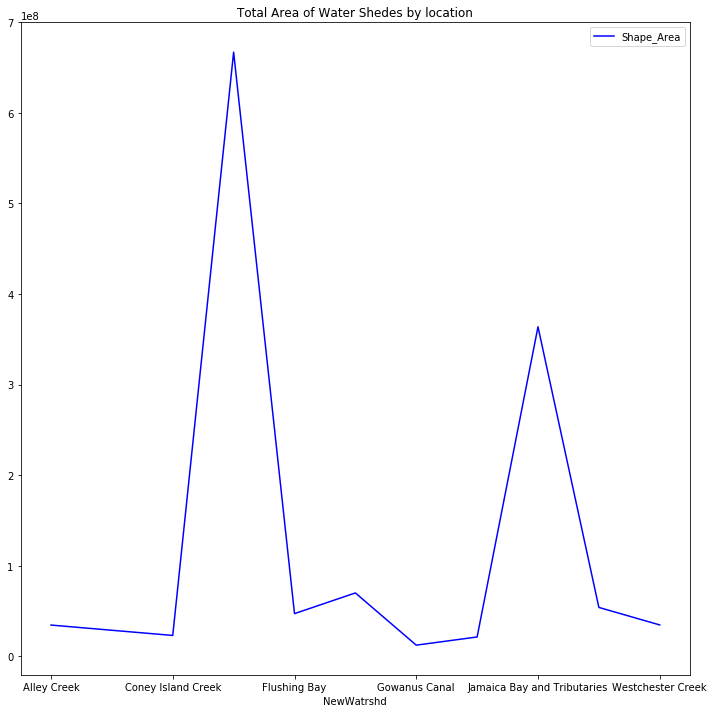

In [23]:
#let's plot this data to get a better understanding. 
Sshade_sum_type_area.plot( color='blue',legend=True,figsize=(12, 12), markersize=1)

plt.title('Total Area of Water Shedes by location')

Text(0.5,1,'Number of Water Shedes Outfalls by location')

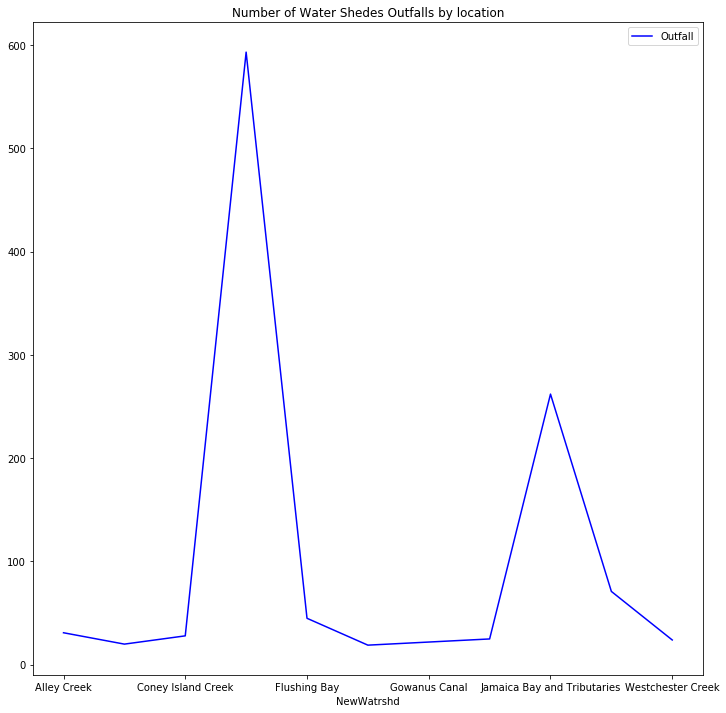

In [24]:
#let's plot this data to get a better understanding. 
Sshade_count_type.plot( color='blue',legend=True,figsize=(12, 12), markersize=1)

plt.title('Number of Water Shedes Outfalls by location')

In [25]:
#We can sort by count
Sshade_count_type = Sshade_count_type.sort_values()
#We can sort by sum
Sshade_sum_type_area = Sshade_sum_type_area.sort_values()

In [26]:
Sshade_count_type.tail(11)

NewWatrshd
Flushing Creek                  19
Bronx River                     20
Gowanus Canal                   22
Westchester Creek               24
Hutchinson River                25
Coney Island Creek              28
Alley Creek                     31
Flushing Bay                    45
Newtown Creek                   71
Jamaica Bay and Tributaries    262
East River / Open Waters       593
Name: Outfall, dtype: int64

In [27]:
Sshade_sum_type_area.head(11)

NewWatrshd
Gowanus Canal                  1.241820e+07
Hutchinson River               2.143421e+07
Coney Island Creek             2.312212e+07
Bronx River                    2.884302e+07
Alley Creek                    3.459238e+07
Westchester Creek              3.473228e+07
Flushing Bay                   4.719743e+07
Newtown Creek                  5.404637e+07
Flushing Creek                 7.004994e+07
Jamaica Bay and Tributaries    3.637965e+08
East River / Open Waters       6.669561e+08
Name: Shape_Area, dtype: float64

We can see from this that East River / Open Waters has the higest area of watershades and number of outfalls. 
And the ones with the smallest area is Gowanus Canal and Hutchison River, Now we can try to find the percentage of area ocupied by each comminuty garden in these area. 

I will use the original sum group because I couldn't add a row to the #Sshade_sum_type_area table. is it impossible?i don't know, I tried and didn't work.

In [28]:
Sshade_sum_type.head(11)

,OBJECTID,Shape_Length,Shape_Area
NewWatrshd,,,
Alley Creek,16162,1.686692e+05,3.459238e+07
Bronx River,8123,1.432831e+05,2.884302e+07
Coney Island Creek,19117,1.101599e+05,2.312212e+07
East River / Open Waters,233416,2.768685e+06,6.669561e+08
Flushing Bay,30064,1.956417e+05,4.719743e+07
Flushing Creek,13649,2.216301e+05,7.004994e+07
Gowanus Canal,12107,7.870885e+04,1.241820e+07
Hutchinson River,17922,1.045124e+05,2.143421e+07
Jamaica Bay and Tributaries,230312,1.324174e+06,3.637965e+08


Since the SewerShades data does not come Boro  data, I will research and create a row for the Boro.

In [29]:
#In order they appear int he Table
Boro = ["Q", "X" , "B", "B","Q", "B", "X", "B", "X"]


After researching the Borough of each location, i found that East River / Open Waters","Jamaica Bay and Tributaries does not belong to any specific Borough, so I will need to take them out if I want to analazie my area by borough. 

In [30]:
Sshade_sum_type = Sshade_sum_type.drop(["East River / Open Waters","Jamaica Bay and Tributaries"], axis = 0)

In [31]:
Sshade_sum_type.head(11)

,OBJECTID,Shape_Length,Shape_Area
NewWatrshd,,,
Alley Creek,16162,168669.203249,3.459238e+07
Bronx River,8123,143283.100126,2.884302e+07
Coney Island Creek,19117,110159.862580,2.312212e+07
Flushing Bay,30064,195641.739197,4.719743e+07
Flushing Creek,13649,221630.062750,7.004994e+07
Gowanus Canal,12107,78708.851658,1.241820e+07
Hutchinson River,17922,104512.394405,2.143421e+07
Newtown Creek,51666,255372.499104,5.404637e+07
Westchester Creek,17832,130305.574589,3.473228e+07


In [32]:
#Those two two location are successfully dropped. Now we can map each specific location to Boro.
Sshade_sum_type["Boro"] = Boro

In [33]:
Sshade_sum_type.head(9)

,OBJECTID,Shape_Length,Shape_Area,Boro
NewWatrshd,,,,
Alley Creek,16162,168669.203249,3.459238e+07,Q
Bronx River,8123,143283.100126,2.884302e+07,X
Coney Island Creek,19117,110159.862580,2.312212e+07,B
Flushing Bay,30064,195641.739197,4.719743e+07,B
Flushing Creek,13649,221630.062750,7.004994e+07,Q
Gowanus Canal,12107,78708.851658,1.241820e+07,B
Hutchinson River,17922,104512.394405,2.143421e+07,X
Newtown Creek,51666,255372.499104,5.404637e+07,B
Westchester Creek,17832,130305.574589,3.473228e+07,X


Now we have a culum for Borough. We can now group Add Comminity Garden area by Boro and Water Shade Area by Boro

In [34]:
CoGardens_Boro_sum = CoGardens.groupby(['Boro']).sum()
Sshade_Boro_sum = Sshade_sum_type.groupby(['Boro']).sum()

In [35]:
CoGardens_Boro_sum.head()

,Council District,Size,Latitude,Longitude,Census Tract
Boro,,,,,
B,7390.0,30.113,7687.590805,-13973.638457,183370.0
M,789.0,15.845,5219.577183,-9466.865742,267011.0
Q,628.0,6.065,773.207414,-1402.616318,226391.0
R,101.0,0.716,81.278626,-148.206001,13309.0
X,1517.0,18.928,3715.914883,-6725.138262,504988.0


In [36]:
Sshade_Boro_sum.head()

,OBJECTID,Shape_Length,Shape_Area
Boro,,,
B,112954,639882.952538,1.367841e+08
Q,29811,390299.266000,1.046423e+08
X,43877,378101.069121,8.500951e+07


In [37]:
Sshade_Boro_sum = Sshade_Boro_sum.append(["M","R"])

In [38]:
Sshade_Boro_sum.head(11)

,0,OBJECTID,Shape_Area,Shape_Length
B,NaN,112954.0,1.367841e+08,639882.952538
Q,NaN,29811.0,1.046423e+08,390299.266000
X,NaN,43877.0,8.500951e+07,378101.069121
0,M,NaN,NaN,NaN
1,R,NaN,NaN,NaN


In [39]:
Sshade_Boro_sum.shape

(5, 4)

In [40]:
#Since we don't have Sshade on Manhattan and Queen, we can add empty clums
Sshade_Boro_sum["New Boro"] = ["B","Q","X", "M", "R"]

In [41]:
Sshade_Boro_sum.head(11)

,0,OBJECTID,Shape_Area,Shape_Length,New Boro
B,NaN,112954.0,1.367841e+08,639882.952538,B
Q,NaN,29811.0,1.046423e+08,390299.266000,Q
X,NaN,43877.0,8.500951e+07,378101.069121,X
0,M,NaN,NaN,NaN,M
1,R,NaN,NaN,NaN,R


In [42]:
CoGardens_Boro_sum = CoGardens_Boro_sum.sort_values(by = "Boro")

In [43]:
Sshade_Boro_sum = Sshade_Boro_sum.sort_values(by = "New Boro")

In [44]:
CoGardens_Boro_sum.head()

,Council District,Size,Latitude,Longitude,Census Tract
Boro,,,,,
B,7390.0,30.113,7687.590805,-13973.638457,183370.0
M,789.0,15.845,5219.577183,-9466.865742,267011.0
Q,628.0,6.065,773.207414,-1402.616318,226391.0
R,101.0,0.716,81.278626,-148.206001,13309.0
X,1517.0,18.928,3715.914883,-6725.138262,504988.0


Now that we fill the missing data to match the size of the two table, we can sort them by Boro to make matching Boro's easier.

In [45]:
Sshade_Boro_sum.head()

,0,OBJECTID,Shape_Area,Shape_Length,New Boro
B,NaN,112954.0,1.367841e+08,639882.952538,B
0,M,NaN,NaN,NaN,M
Q,NaN,29811.0,1.046423e+08,390299.266000,Q
1,R,NaN,NaN,NaN,R
X,NaN,43877.0,8.500951e+07,378101.069121,X


In [46]:
#print(Sshade_Boro_sum.Shape_Area.iloc(0)

In [47]:
PercentageGardenOverWatershade = []
for i in range(len(CoGardens_Boro_sum)):
    #Due to the large difference between the Sshade are and garden area, Reduce the Sshade are before finding
    #Note the percentage we will be getting will be relative to each other.
    reduced_area = Sshade_Boro_sum.Shape_Area.iloc[i]/ 10**6
    PercentageGardenOverWatershade.append((CoGardens_Boro_sum.Size.iloc[i]/reduced_area)*100)
CoGardens_Boro_sum["PercentageGardenOverWatershade"] = PercentageGardenOverWatershade
PercentageGardenOverWatershade = CoGardens_Boro_sum

In [48]:
PercentageGardenOverWatershade.head()

,Council District,Size,Latitude,Longitude,Census Tract,PercentageGardenOverWatershade
Boro,,,,,,
B,7390.0,30.113,7687.590805,-13973.638457,183370.0,22.014983
M,789.0,15.845,5219.577183,-9466.865742,267011.0,NaN
Q,628.0,6.065,773.207414,-1402.616318,226391.0,5.795934
R,101.0,0.716,81.278626,-148.206001,13309.0,NaN
X,1517.0,18.928,3715.914883,-6725.138262,504988.0,22.265745


Note that the percentage we have hear is relative and not the actual percenatage. But it should be enought to help us 
compare the Borough.

Now using this relative percentage, we can focus on the comminuty gardens in the Bronx and Brooklyn since they are around the same area  as the ocupy more area within the Water Shade area. 

In [49]:
CoGardens.head()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
0,NaN,M,M03,2.0,11 BC Serenity Garden,626 East 11th Street,0.054,DPR,East Village,Avenues B & C,40.727124,-73.978677,10009,28.0,1000000,1003930020,Lower East Side ...,POINT (-73.979 40.727)
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
2,M382,M,M11,9.0,110th Street Block Association,1651 Madison Avenue,0.043,DPR,East Harlem,Active,40.796295,-73.947533,10029,17402.0,1000000,1016160023,East Harlem South ...,POINT (-73.948 40.796)
3,M331,M,M11,8.0,117th Street Community Garden,172 E 117th Street,0.080,DPR,East Harlem,Active,40.798976,-73.940376,10035,182.0,1089914,1016440046,East Harlem North ...,POINT (-73.940 40.799)
4,NaN,M,M03,2.0,11th Street Community Garden,422 East 11th Street,0.054,TPL,East Village,1st Avenue & Avenue A,40.729079,-73.983327,10009,34.0,1000000,1004380019,East Village ...,POINT (-73.983 40.729)


In [50]:
BX_gardens = CoGardens[CoGardens["Boro"] =="X"]
BR_gardens = CoGardens[CoGardens["Boro"] =="B"]

In [51]:
BX_gardens.head()


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
5,NaN,X,X12,15.0,211th Street Block Association.,Carlisle Place,0.182,NYRP,NaN,At E. 211th Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
6,NaN,X,X06,15.0,2120 Mapes Avenue HDFC,2124 Mapes Avenue,0.151,TPL,NaN,At E. 181st Street,40.847216,-73.885018,10460,36501.0,2000000,2031110007,East Tremont ...,POINT (-73.885 40.847)
14,X351,X,X03,17.0,811 Family and Friends Association,809 Courtlandt Avenue,0.063,DPR,NaN,Active,40.823065,-73.916450,10451,69.0,2000000,2024180022,Melrose South-Mott Haven North ...,POINT (-73.916 40.823)
18,X350,X,X03,16.0,A. Badillo Community Rose Garden,924 Melrose Avenue,0.064,DPR,Melrose,Active,40.825130,-73.913329,10451,141.0,2000000,2023840009,Morrisania-Melrose ...,POINT (-73.913 40.825)
21,NaN,X,X09,18.0,Adlai E. Stevenson High School-Ecological Garden,1980 Lafayette Avenue/Stickball Avenue,NaN,DOE,NaN,Lafayette & Stickball Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)


In [52]:
BR_gardens.head()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
1,NaN,B,B08,36.0,1100 Bergen Street Community Garden,1101 & 1105 Bergen Street,0.207,PRI,Crown Heights,Nostrand & New York Avenues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
7,B535,B,B05,42.0,400 Montauk Avenue Block Association. (Ismael ...,New Lots Avenue,0.091,DPR,East New York,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
9,NaN,B,B07,38.0,6/15 Green,274 15th Street,0.287,TPL,Park Slope,corner of 6th Avenue & 15th Street,40.664706,-73.987554,11215,141.0,3000000,3010480034,Park Slope-Gowanus ...,POINT (-73.988 40.665)
10,NaN,B,B07,0.0,64th Street Community Garden,64th Street,NaN,DOT,Sunset Park,West of 4th Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
13,B438,B,B16,41.0,700 Decatur Street Block Association,700 Decatur Street,0.114,DPR,Bed-Stuy,Active,40.683541,-73.915121,11233,373.0,3040656,3015060032,Ocean Hill ...,POINT (-73.915 40.684)


In [53]:
BX_gardens.shape

(120, 18)

In [54]:
BR_gardens.shape

(226, 18)

In [55]:
#Let's Sort them Gardens by Size
Sorted_BX_gardens = BX_gardens.sort_values(by = 'Size', ascending = False)
Sorted_BR_gardens = BR_gardens.sort_values(by = 'Size', ascending = False)

In [56]:
Sorted_BX_gardens.head()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
356,NaN,X,X09,18.0,P.S. 138X,2060 Lafayette Avenue,1.345,DOE,NaN,NaN,40.822665,-73.853366,10473,74.0,2022289,2036090016,Soundview-Castle Hill-Clason Point-Harding Par...,POINT (-73.853 40.823)
209,X118A,X,X09,18.0,Harding Park Beautification Project,155 Harding Park,1.160,DPR,NaN,Active,40.807736,-73.857874,10473,2.0,,,Soundview-Castle Hill-Clason Point-Harding Par...,POINT (-73.858 40.808)
448,X335,X,X07,15.0,Risse Street Community Garden (Triangle Park),2 East Mosholu Parkway,0.694,DPR,NaN,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (nan nan)
233,NaN,X,X06,15.0,I.S. 193X,1919 Prospect Avenue,0.677,DOE,NaN,NaN,40.843546,-73.889755,10457,36901.0,2094582,2029510032,East Tremont ...,POINT (-73.890 40.844)
266,X266A,X,X06,15.0,Krystal Community Garden,2085-2093 Vyse Avenue.,0.614,DPR,NaN,Active,40.843482,-73.880860,10460,363.0,2118291,2031270070,East Tremont ...,POINT (-73.881 40.843)


In [57]:
Sorted_BR_gardens.head()

,PropID,Boro,Community Board,Council District,Garden Name,Address,Size,Jurisdiction,NeighborhoodName,Cross Streets,Latitude,Longitude,Postcode,Census Tract,BIN,BBL,NTA,geometry
244,NaN,B,B02,35.0,J.H.S. 265,101 Park Avenue,2.712,DOE,NaN,N. Portland/Flushing,40.696324,-73.975780,11205,211.0,3057942,3020280001,Fort Greene ...,POINT (-73.97578 40.69632)
478,B383,B,B05,NaN,Success Garden,461 Williams Avenue,0.918,DPR,NaN,NaN,40.664659,-73.897865,11207,1130.0,3000000,3038020001,East New York (Pennsylvania Ave) ...,POINT (-73.89786 40.66466)
355,NaN,B,B16,41.0,P.S. 137,121 Saratoga Avenue,0.735,DOE,Bed-Stuy,NaN,40.682458,-73.917088,11233,373.0,3040878,3015100001,Ocean Hill ...,POINT (-73.91709 40.68246)
359,NaN,B,B16,37.0,P.S. 155,1355 Herkimer Street,0.689,DOE,NaN,NaN,40.677415,-73.908734,11233,369.0,3042263,3015520043,Ocean Hill ...,POINT (-73.90873 40.67742)
259,NaN,B,B06,38.0,John Jay High School,"237 7th Avenue. Brooklyn, NY 11215",0.689,DOE,Park Slope,corner of 7th & 5th Street,40.669629,-73.979287,11215,155.0,3025510,3010820001,Park Slope-Gowanus ...,POINT (-73.97929 40.66963)


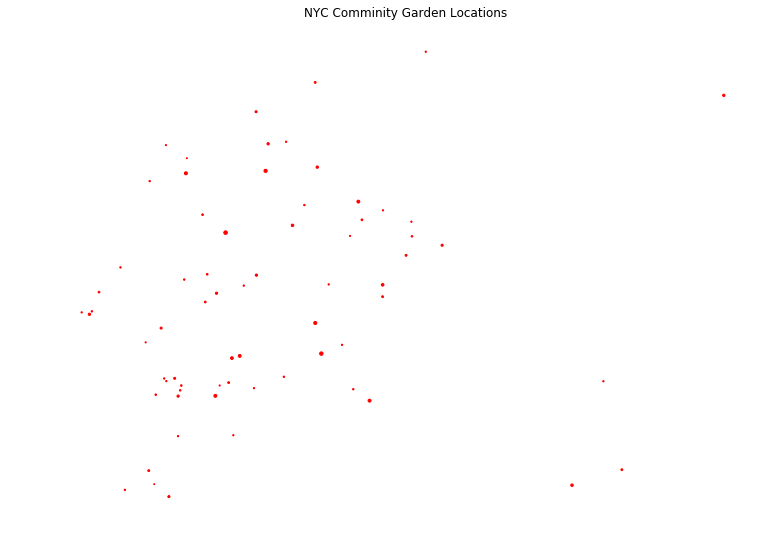

In [58]:
#We can map them 
#Plot the gardens and show the relative sizes
Sorted_BX_gardens.plot( color='red',legend=True,figsize=(13, 13),markersize=CoGardens.Size * 30)
plt.axis('off')
plt.title('NYC Comminity Garden Locations')
plt.show()

In [59]:
Sorted_BR_gardens.plot( color='red',legend=True,figsize=(13, 13),markersize=CoGardens.Size * 30)
plt.axis('off')
plt.title('NYC Comminity Garden Locations By Size')
plt.show()m

SyntaxError: invalid syntax (<ipython-input-59-dd7aa1158e71>, line 4)

We decided to stop here since the number we were getting were giving very broad information and wasn't too useful in our analysis. We switched over the QGis to contunue with the visualization. 